## Arrangiamento Calendario

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

fname = "Calendario_Campionato---A-buon-rendere.xlsx"
directory = "C://Users//udazz//Dropbox//Documenti//fanta//pyanalysis_2021//input//"
df = pd.read_excel(directory+fname, skiprows=2)
df = df.drop(['Unnamed: 5', 'Unnamed: 4', 'Unnamed: 10'], axis=1)
ultima_giornata = df.iloc[86:90] #poi qua dovrai fare l'append
df = df.dropna()
df = df.reset_index(drop=True)

start = 0
data = pd.DataFrame()
while start < 69: 
    blocco = df.iloc[start:start+4]
    start = start+4
    blocco1 = blocco[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']]
    blocco2 = blocco[['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9']]
    rencol_2 = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']
    blocco2.columns = rencol_2
    blocco1 = blocco1.append(blocco2)
    data = data.append(blocco1)
data = data.append(ultima_giornata)
data = data.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1)
data = data.reset_index(drop=True)

players1 = set(df['Unnamed: 0'])
players2 = set(df['Unnamed: 3'])
players = players1 | players2
players = sorted(players, key=str.lower)
df = pd.DataFrame()

for player in players:
    a = data[data["Unnamed: 0"].str.contains(player)]
    b = data[data["Unnamed: 3"].str.contains(player)]
    a = a[['Unnamed: 0', 'Unnamed: 1']]
    b = b[['Unnamed: 3', 'Unnamed: 2']]
    nomi_colonne = ['squadra', 'fantapunti']
    a.columns = nomi_colonne
    b.columns = nomi_colonne
    result = pd.concat([a,b])
    result = result.sort_index()
    result = result.reset_index(drop=True)
    df = df.append(result)
    
df['giornata'] = df.index + 1 

df['goal'] = pd.Series
for i in range(len(df)):
    if df['fantapunti'].iloc[i] < 66:
        df['goal'].iloc[i] = 0
    elif df['fantapunti'].iloc[i] >= 66 and df['fantapunti'].iloc[i] < 70:
        df['goal'].iloc[i] = 1
    elif df['fantapunti'].iloc[i] >= 70 and df['fantapunti'].iloc[i] < 74:
        df['goal'].iloc[i] = 2
    elif df['fantapunti'].iloc[i] >= 74 and df['fantapunti'].iloc[i] < 78:
        df['goal'].iloc[i] = 3
    elif df['fantapunti'].iloc[i] >= 78 and df['fantapunti'].iloc[i] < 82:
        df['goal'].iloc[i] = 4
    elif df['fantapunti'].iloc[i] >= 82 and df['fantapunti'].iloc[i] < 86:
        df['goal'].iloc[i] = 5
    elif df['fantapunti'].iloc[i] >= 86 and df['fantapunti'].iloc[i] < 90:
        df['goal'].iloc[i] = 6
    elif df['fantapunti'].iloc[i] >= 90 and df['fantapunti'].iloc[i] < 94:
        df['goal'].iloc[i] = 7
    elif df['fantapunti'].iloc[i] >= 94 and df['fantapunti'].iloc[i] < 98:
        df['goal'].iloc[i] = 8
    elif df['fantapunti'].iloc[i] >= 98 and df['fantapunti'].iloc[i] < 102:
        df['goal'].iloc[i] = 9
    elif df['fantapunti'].iloc[i] >= 102 and df['fantapunti'].iloc[i] < 106:
        df['goal'].iloc[i] = 10

In [3]:
#save
df.to_excel('calendario_2021.xlsx', index=False)

## Grafici

In [4]:
import numpy as np

from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns 
plt.rcParams['figure.figsize'] = 15,7 #grandezza grafico fissata a priori
sns.set(style="whitegrid")

df['fantapunti'] = df['fantapunti'].replace(0, np.nan)
df = df.dropna()
df

,squadra,fantapunti,giornata,goal
0,asdMalerba,74.0,1,3
1,asdMalerba,86.0,2,6
2,asdMalerba,66.0,3,1
0,Barriera-team,70.0,1,2
1,Barriera-team,75.0,2,3
2,Barriera-team,70.5,3,2
0,CACCOLA F.C.,79.0,1,4
1,CACCOLA F.C.,72.0,2,2
2,CACCOLA F.C.,77.5,3,3
0,Capitan Martella,83.0,1,5


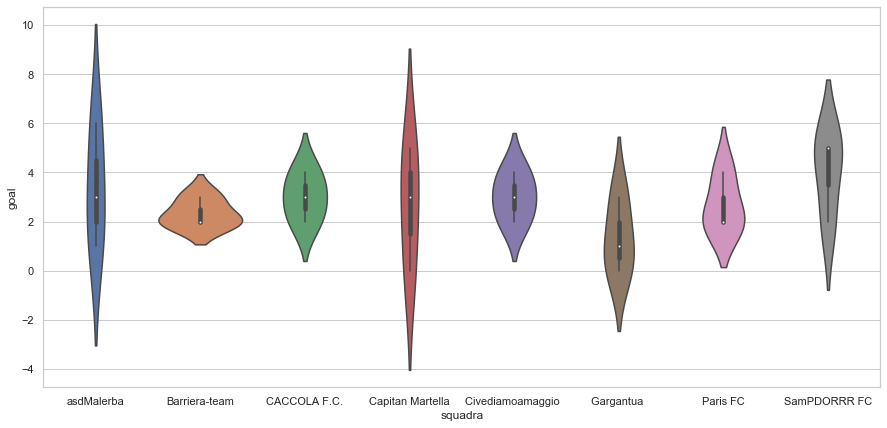

In [5]:
plt.rcParams['figure.figsize'] = 15,7
ax1 = sns.violinplot(df.squadra, df.goal)

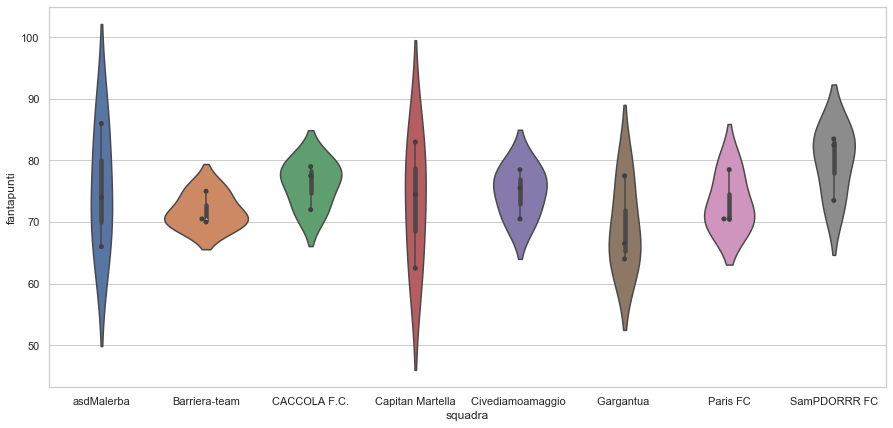

In [6]:
ax2 = sns.violinplot(df.squadra, df.fantapunti)
ax2 = sns.swarmplot(df.squadra, df.fantapunti, color=".25")

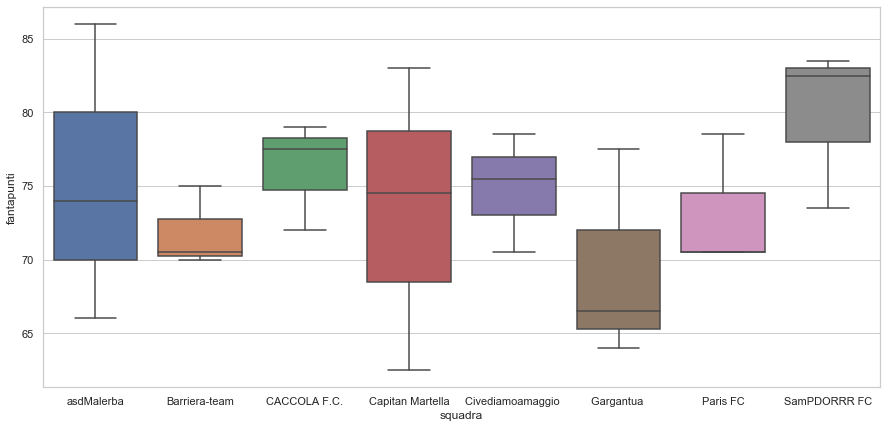

In [7]:
ax3 = sns.boxplot(data = df, x='squadra', y='fantapunti')

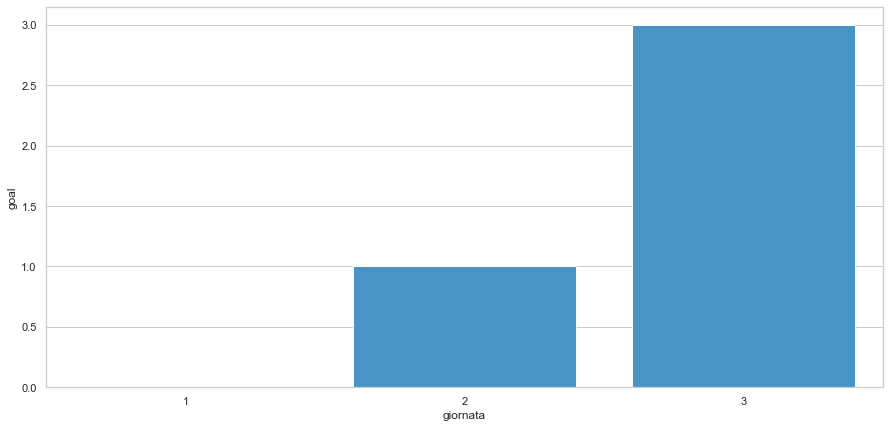

In [8]:
#performance di un singolo giocatore 
filtro_io = df.squadra == players[5] #qui selezioni chi vuoi vedere
df_io = df[filtro_io]
df_io.dropna(inplace=True)
df_io.set_index('giornata', inplace=True)
ax = sns.barplot(x=df_io.index, y=df_io.goal, color="#3498db")

## Analysis

In [9]:
import numpy as np
df['fantapunti'] = df['fantapunti'].replace(0, np.nan)
df = df.dropna()
data = df.pivot(index='squadra', columns='giornata', values='goal') #reshape the dataset

#rinominare le colonne
lenght, width = data.shape #larghezza del dataset
nomi_colonne = []
for i in range(1,width+1):
    nomi_colonne.append('goal_fatti'+ str(i))
data.columns = nomi_colonne
data.sort_values(["squadra"], inplace=True) #per semplicità voglio ordinare le squadre in ordine alfabetico
data

,goal_fatti1,goal_fatti2,goal_fatti3
squadra,,,
Barriera-team,2,3,2
CACCOLA F.C.,4,2,3
Capitan Martella,5,3,0
Civediamoamaggio,2,3,4
Gargantua,0,1,3
Paris FC,2,4,2
SamPDORRR FC,5,5,2
asdMalerba,3,6,1


In [10]:
#ora che ho il dataset pronto, posso passare all'analisi
from itertools import permutations, product #permutations non serve ad un cazzo
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns #seaborn
plt.rcParams['figure.figsize'] = 15,5 #grandezza grafico

In [11]:
lista_confronti=[]
for i in data.columns: #per ogni colonna (ovvero per ogni giornata ogni giornata)...
    i = list(product(data[i], data[i])) #... accoppiami tutti i numeri, verranno quindi 64 (8*8) coppie
    lista_confronti.append(i)

In [12]:
giornate = len(lista_confronti) #quante gironate sono state giocate
matrici88_giornate = [] 
for i in range(giornate): #cioè per ogni giornata
    for elementi in lista_confronti[i]: 
        elementi = elementi[0] - elementi[1] #genera la differenza di tutte le coppie generate in lista_confronti (sopra)
        if elementi > 0:    
            elementi = 3 #vittoria
        elif elementi < 0:  
            elementi = 0 #sconfitta
        else:               
            elementi = 1 #pareggio
        matrici88_giornate.append(elementi)

#organizza la lista che hai appena creato nel seguente modo:
    #ci sono tante matrici 8*8 quante sono le giornate
    #ogni matrice è una giornata
    #sulle righe di ogni matrice abbiamo la performance degli otto giocatori
matrici88_giornate = np.array(matrici88_giornate).reshape((giornate, 8, 8)) 
matrici88_giornate

array([[[1, 0, 0, 1, 3, 1, 0, 0],
        [3, 1, 0, 3, 3, 3, 0, 3],
        [3, 3, 1, 3, 3, 3, 1, 3],
        [1, 0, 0, 1, 3, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 1, 3, 1, 0, 0],
        [3, 3, 1, 3, 3, 3, 1, 3],
        [3, 0, 0, 3, 3, 3, 0, 1]],

       [[1, 3, 1, 1, 3, 0, 0, 0],
        [0, 1, 0, 0, 3, 0, 0, 0],
        [1, 3, 1, 1, 3, 0, 0, 0],
        [1, 3, 1, 1, 3, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [3, 3, 3, 3, 3, 1, 0, 0],
        [3, 3, 3, 3, 3, 3, 1, 0],
        [3, 3, 3, 3, 3, 3, 3, 1]],

       [[1, 0, 3, 0, 0, 1, 1, 3],
        [3, 1, 3, 0, 1, 3, 3, 3],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [3, 3, 3, 1, 3, 3, 3, 3],
        [3, 1, 3, 0, 1, 3, 3, 3],
        [1, 0, 3, 0, 0, 1, 1, 3],
        [1, 0, 3, 0, 0, 1, 1, 3],
        [0, 0, 3, 0, 0, 0, 0, 1]]])

In [13]:
#creo questa matrice per togliere il punto che ad ogni giornata veniva precendentemente assegnato di default 
    #(questo accadeva perché tutti giocavano contro se stessi)
validation_matrix = np.ones([giornate,8,8])
d3, row, col = validation_matrix.shape
for k in range(d3):
    for i in range(row):
        for j in range(col):
            if i == j: 
                validation_matrix[k,i,j] = 0

matrici88_giornate = matrici88_giornate * validation_matrix

In [14]:
### PUNTI OGNI GIORNATA ###

#non ricordo come funziona la np.sum, con axis=2, funziona solo per 3D array, era nella lezione03_03 del corso LinkedIn
punti_giornata = matrici88_giornate.sum(axis=2)  
punti_giornata #ora ogni riga rappresenta una giornata, ogni colonna un giocatore, ma a me serve la trasposta

array([[ 5., 15., 19.,  5.,  0.,  5., 19., 12.],
       [ 8.,  3.,  8.,  8.,  0., 15., 18., 21.],
       [ 8., 16.,  0., 21., 16.,  8.,  8.,  3.]])

In [15]:
punti_giornata = punti_giornata.T #ora ogni matrice rappresenta la performance di ogni giocatore nelle giornate
punti_giornata = pd.DataFrame(punti_giornata) 
punti_giornata.set_index(data.index, inplace=True)
punti_giornata.columns = data.columns

In [16]:
#setto i nomi delle variabili, ora sono uguali ai nomi delle variabili del dataset originale
punti_giornata.columns = data.columns #ma voglio cambiare la parola 'goal' che non va bene
nuovi_nomi = []
for elementi in punti_giornata.columns:
    elementi = elementi.replace('goal','punti') #sostituisci la parola 'goal' con la parola 'punti'
    nuovi_nomi.append(elementi)
punti_giornata.columns = nuovi_nomi
punti_giornata = punti_giornata.astype(int) #trasformiamo i valori del dataframe in int
punti_giornata

,punti_fatti1,punti_fatti2,punti_fatti3
squadra,,,
Barriera-team,5,8,8
CACCOLA F.C.,15,3,16
Capitan Martella,19,8,0
Civediamoamaggio,5,8,21
Gargantua,0,0,16
Paris FC,5,15,8
SamPDORRR FC,19,18,8
asdMalerba,12,21,3


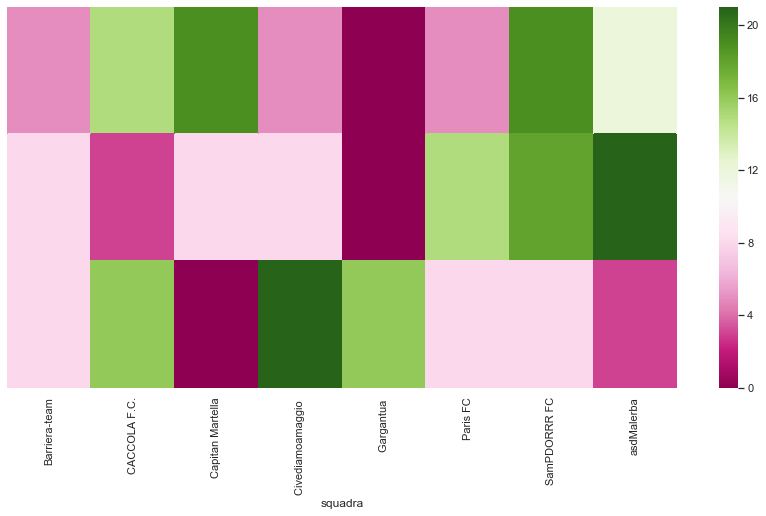

In [17]:
plt.rcParams['figure.figsize'] = 15,7
sns.heatmap(punti_giornata.T, cmap="PiYG", xticklabels=punti_giornata.index, yticklabels=False); 
#at the bottom trovi le ultime giornate, in alto le prime 

In [18]:
### CLASSIFICA FINALE ###
#non sono sicuro che devo necessariamente trasformare il dataframe in np.matrix/array per poter sommare orizzontalmente
    #(axis=0 somma verticale)
classifica_finale = np.asmatrix(punti_giornata).sum(axis=1)

In [19]:
data['classifica_finale'] = classifica_finale #aggiungo la classifica finale al dataset 
data.sort_values(["classifica_finale"], ascending=False, inplace=True) #ordinare dal più alto al più basso
classifica_finale = data['classifica_finale'] #per tenere solo la classifica (creo un altro dataset)
classifica_finale

squadra
SamPDORRR FC         45
asdMalerba           36
CACCOLA F.C.         34
Civediamoamaggio     34
Paris FC             28
Capitan Martella     27
Barriera-team        21
Gargantua            16
Name: classifica_finale, dtype: int32

In [20]:
(classifica_finale/7).round(1) #per fare 3 punti devi battere tutti gli altri 

squadra
SamPDORRR FC         6.4
asdMalerba           5.1
CACCOLA F.C.         4.9
Civediamoamaggio     4.9
Paris FC             4.0
Capitan Martella     3.9
Barriera-team        3.0
Gargantua            2.3
Name: classifica_finale, dtype: float64

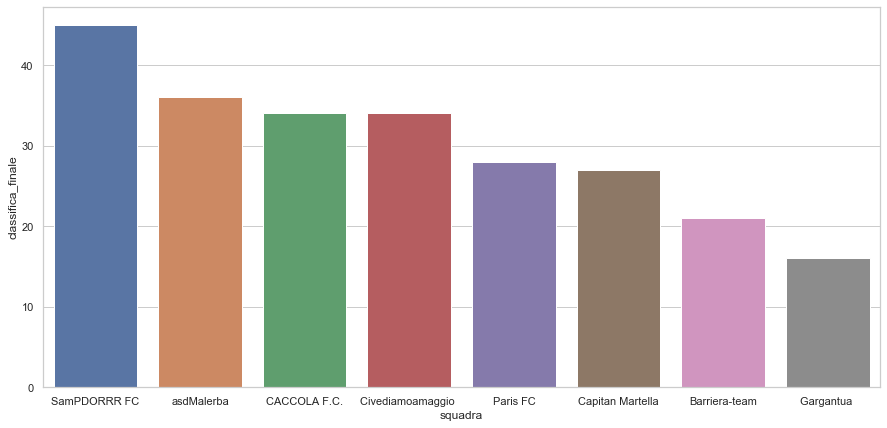

In [21]:
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
sns.barplot(x=data.index, y=data.classifica_finale);

## Scontri 1 contro 1 

In [22]:
df.goal = df.goal.astype(int) #convert data.goal in int (da float che era)
df

,squadra,fantapunti,giornata,goal
0,asdMalerba,74.0,1,3
1,asdMalerba,86.0,2,6
2,asdMalerba,66.0,3,1
0,Barriera-team,70.0,1,2
1,Barriera-team,75.0,2,3
2,Barriera-team,70.5,3,2
0,CACCOLA F.C.,79.0,1,4
1,CACCOLA F.C.,72.0,2,2
2,CACCOLA F.C.,77.5,3,3
0,Capitan Martella,83.0,1,5


In [46]:
andrea = 'Civediamoamaggio ' 
fede = 'Gargantua'
simo = 'Paris'
mirko = 'Caccola'
matte = 'Barriera-Team'
ale = 'ASDMalerba'
alex = 'SamPDORRR FC'
gianlu = 'Capitan Martella'

giocatore1 = andrea
giocatore2 = alex

In [47]:
giornate = max(df.giornata)
data = df.copy()
data.drop(columns=['fantapunti'], inplace=True) 
data = data[(data.squadra == giocatore1) | (data.squadra == giocatore2)] #filter
data = data.pivot(index='giornata', columns='squadra', values='goal') #reshape
data['diff'] = data[giocatore1] - data[giocatore2] #non importa l'ordine alfabetico delle colonne, farà sempre giocat1-giocat2
data

squadra,Civediamoamaggio,SamPDORRR FC,diff
giornata,,,
1,2,5,-3
2,3,5,-2
3,4,2,2


In [48]:
#pure qui non importa l'ordine alfabetico: quello alto (sopra lo zero) sarà sempre il giocatore1
import plotly.express as px
fig = px.area(data, x=data.index, y='diff')
fig.update_layout(xaxis_title='Giornata',
                   yaxis_title='Differenza')
fig.show()

In [49]:
lenght, width = data.shape
matrix = np.matrix(data) #per pacioccarlo devo trasformarlo in numpy.array

In [50]:
punti_giocatore1 = []
for i in range(lenght):
    if matrix[i,2] > 0:
        i = 3
    elif matrix[i,2] < 0:
        i = 0
    else:
        i = 1
    punti_giocatore1.append(i)

print(punti_giocatore1)

[0, 0, 3]


In [51]:
punti_giocatore2 = []
for i in range(lenght):
    if matrix[i,2] < 0:
        i = 3
    elif matrix[i,2] > 0:
        i = 0
    else:
        i = 1
    punti_giocatore2.append(i)

print(punti_giocatore2)

[3, 3, 0]


In [52]:
print('punti', giocatore1+':', sum(punti_giocatore1))
print('punti', giocatore2+':', sum(punti_giocatore2))

punti Civediamoamaggio : 3
punti SamPDORRR FC: 6
